In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [55]:
relu = lambda x: x if x >= 0.0 else 0.0
vrelu = np.vectorize(relu)

In [2]:
hidden_units = 4

In [10]:
theta = np.random.random((4,2)) * 2.0 - 1.0
theta

array([[-0.29589243,  0.3845971 ],
       [ 0.89695216,  0.29570731],
       [ 0.50343341, -0.45949163],
       [-0.03320455,  0.0483336 ]])

In [65]:
phi = np.random.random((5, 2)) * 2.0 - 1.0
phi.T

array([[ 0.19042084,  0.49242779,  0.4599142 ,  0.51657101,  0.16721592],
       [-0.16500914, -0.97698992,  0.98892004,  0.7378984 , -0.49275162]])

In [27]:
x = 0.5

In [28]:
np.ones(4)

array([1., 1., 1., 1.])

In [29]:
np.repeat(x, 4)

array([0.5, 0.5, 0.5, 0.5])

In [30]:
np.vstack([np.ones(4), np.repeat(x, 4)])

array([[1. , 1. , 1. , 1. ],
       [0.5, 0.5, 0.5, 0.5]])

In [79]:
pre_activation = theta[:, 0] + theta[:, 1] * np.repeat(x, 4)
print(pre_activation)

h = vrelu(pre_activation)
print(h)

h = np.insert(h, 0, 1, axis=0)
h

phi.T @ h

[-0.10359388  1.04480582  0.27368759 -0.00903775]
[0.         1.04480582 0.27368759 0.        ]


array([0.81232094, 1.07017391])

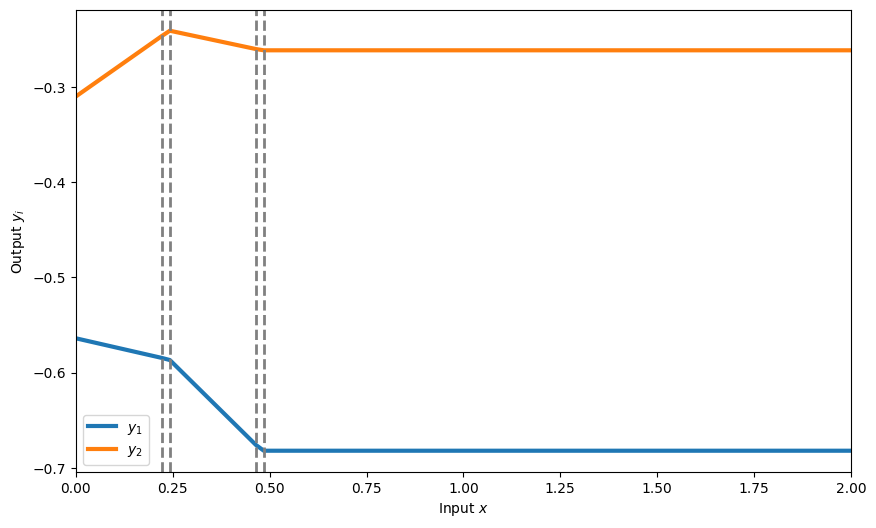

In [413]:
hidden_units = 4
theta = np.random.random((hidden_units, 2)) * 2.0 - 1.0
phi = np.random.random((hidden_units + 1, 2)) * 2.0 - 1.0

def y(x):
    pre_activation = theta[:, 0] + theta[:, 1] * np.repeat(x, hidden_units)
    h = vrelu(pre_activation)
    h = np.insert(h, 0, 1, axis=0)
    return phi.T @ h

vy = np.vectorize(y)
X = np.linspace(0.0, 2.0, 100)

ys = []
for x in X:
    ys.append(y(x))

plt.figure(figsize=(10,6))
plt.xlim([0, 2])
# plt.ylim([-2, 2])
plt.plot(X, ys, lw=3)
plt.xlabel("Input $x$")
plt.ylabel("Output $y_i$")
plt.legend(["$y_1$", "$y_2$"])

dfdx2 = np.abs(np.diff(np.diff(np.array(ys)[:, 0]))) >= 1e-5
dfdx2 = np.concatenate(([False], dfdx2))

for i in range(dfdx2.shape[0]):
    if dfdx2[i]:
        plt.axvline(X[i], ls='dashed', c='gray', lw='2')

In [341]:
np.array([1,1,1]) * np.array(range(1, 10)).reshape((3, 3)).T

array([ 6, 15, 24])

In [342]:
np.array([1,1,1])

array([1, 1, 1])

In [343]:
np.array(range(1, 10)).reshape((3, 3)).T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [400]:
n_inputs = 3
n_hidden = 16
n_outputs = 2

X = np.array(np.ones(n_inputs))
print(f"{X=}")

X = np.concatenate(([1], X))
print(f"{X=}")

theta = np.random.random((n_hidden, n_inputs + 1))
print(f"{theta=}")

phi = np.random.random((n_outputs, n_hidden + 1))
print(f"{phi=}")

y = phi @ np.concatenate(([1], vrelu(X @ theta.T)))
print(f"{y=}")

X=array([1., 1., 1.])
X=array([1., 1., 1., 1.])
theta=array([[0.47363976, 0.25363178, 0.13144047, 0.17332338],
       [0.85582078, 0.3895613 , 0.43968055, 0.89043037],
       [0.34196351, 0.75778733, 0.63115598, 0.67223819],
       [0.88703461, 0.88199057, 0.43263541, 0.41040973],
       [0.16764564, 0.53395146, 0.62659949, 0.58935243],
       [0.08997044, 0.8915849 , 0.62539464, 0.09833306],
       [0.61523309, 0.16586195, 0.53407176, 0.60210947],
       [0.51557439, 0.75732027, 0.63878981, 0.77139029],
       [0.83423875, 0.59153948, 0.84126826, 0.31528122],
       [0.26289359, 0.48171942, 0.94141663, 0.53568029],
       [0.29815283, 0.63418729, 0.44634941, 0.22535929],
       [0.8166824 , 0.63647227, 0.3710827 , 0.16431642],
       [0.55176131, 0.63946603, 0.71174447, 0.47977346],
       [0.64019255, 0.84471194, 0.23452583, 0.91566628],
       [0.29935202, 0.87680008, 0.46570441, 0.92513366],
       [0.35930365, 0.86928832, 0.26813292, 0.62191908]])
phi=array([[0.92024807, 0.3062315